In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: cycler>=0.10 in c:\users\roshi\anaconda3\lib\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (0.11.0)



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("D:/PROJECT/Loan Prediction/train_ctrUa4K.csv")
test=pd.read_csv("D:/PROJECT/Loan Prediction/test_lAUu6dG.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

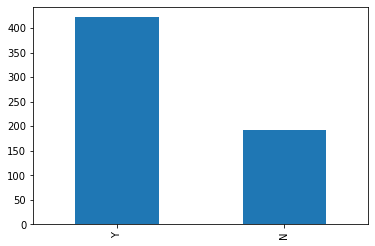

In [11]:
train['Loan_Status'].value_counts().plot.bar()

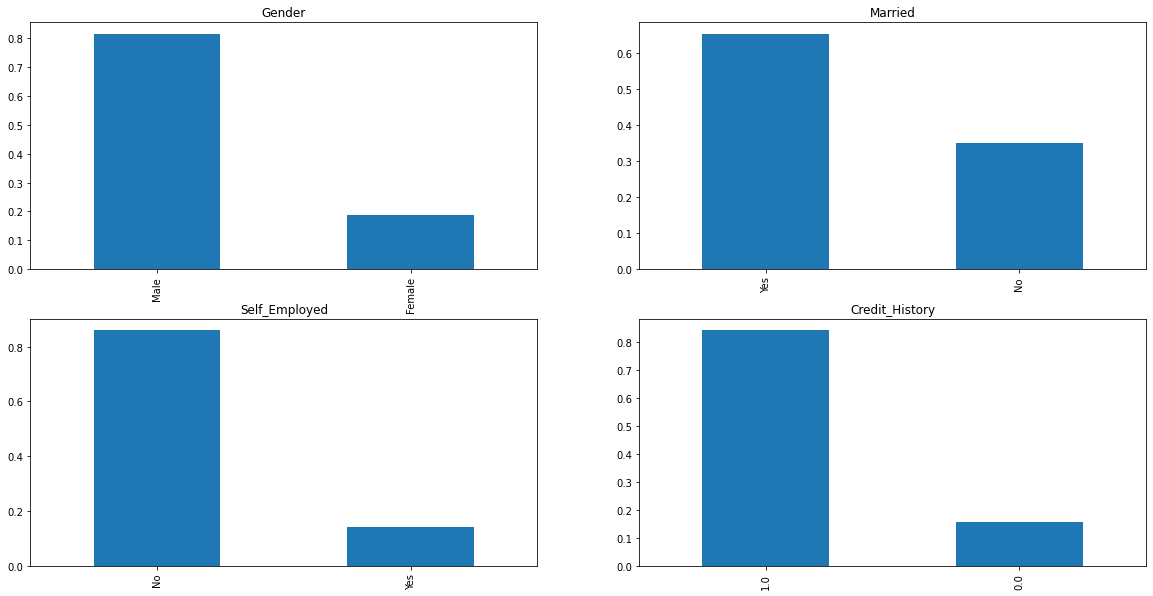

In [12]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

<AxesSubplot:title={'center':'Property_Area'}>

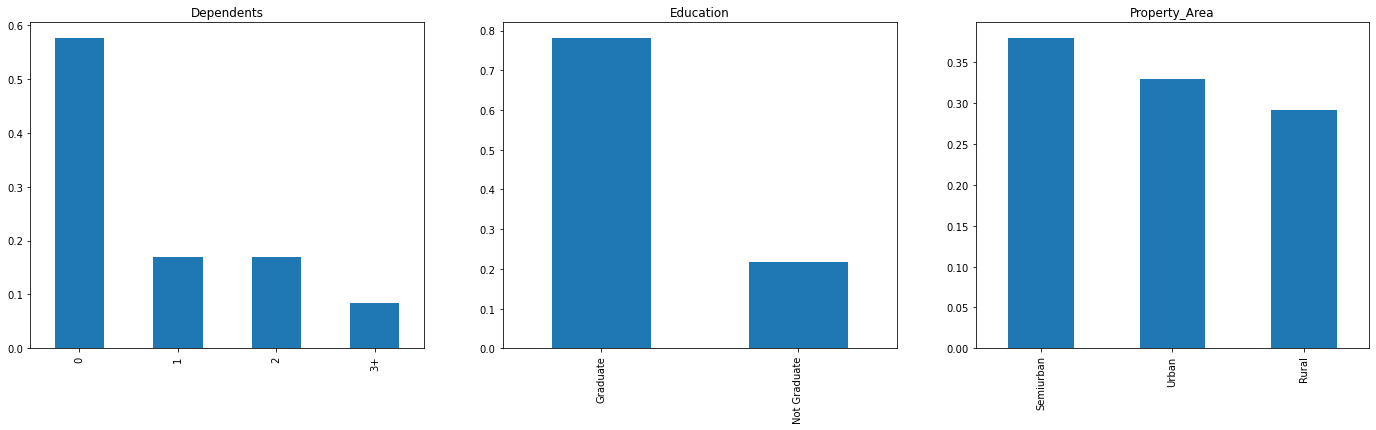

In [13]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

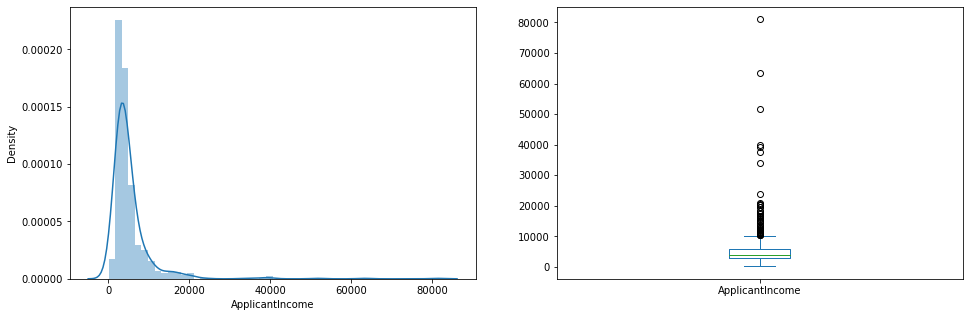

In [14]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [15]:
pip install --upgrade pandas seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\roshi\anaconda3\lib\site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.3.2)



In [16]:
train['ApplicantIncome'].dropna(inplace=True)

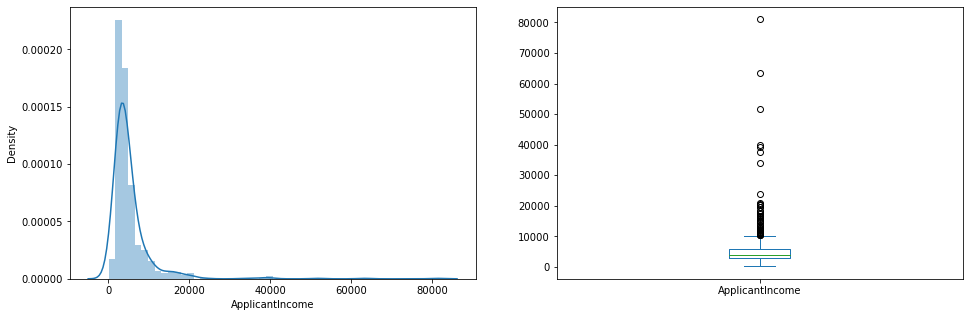

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16, 5))

plt.show()

<AxesSubplot:>

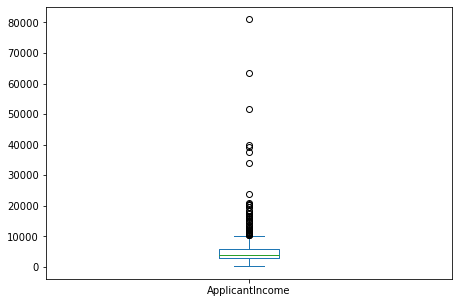

In [18]:
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16, 5))

Text(0.5, 0.98, '')

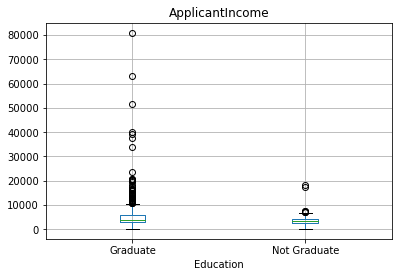

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

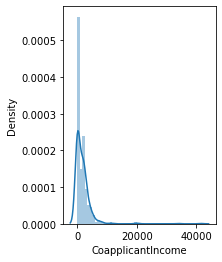

In [20]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])


<AxesSubplot:>

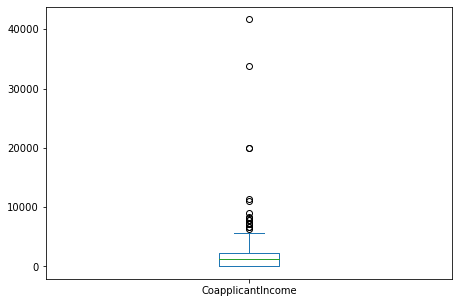

In [21]:
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

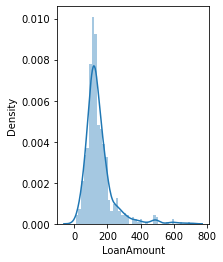

In [22]:
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])

<AxesSubplot:>

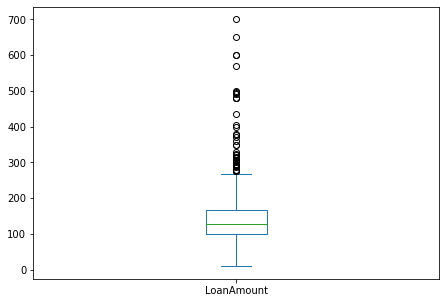

In [23]:
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

In [24]:
#Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

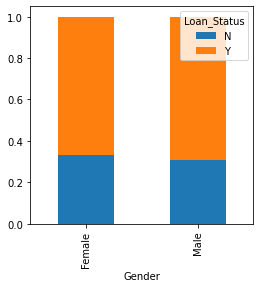

In [25]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

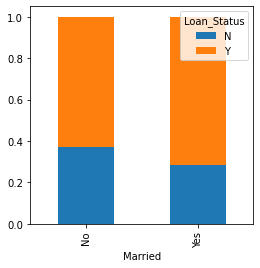

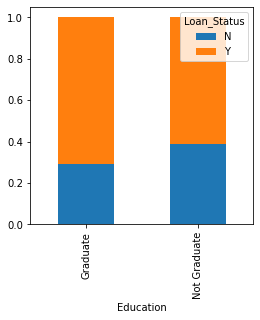

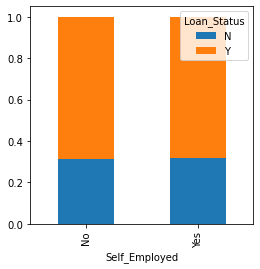

In [26]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

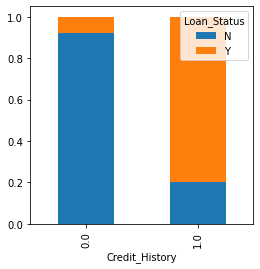

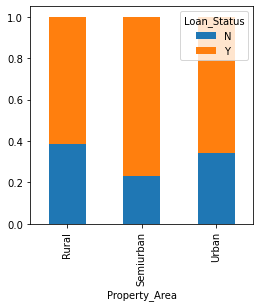

In [27]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

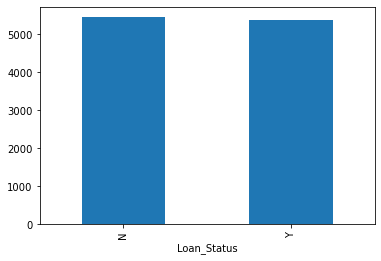

In [28]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [29]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

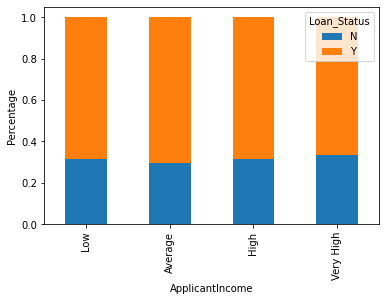

In [30]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [31]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

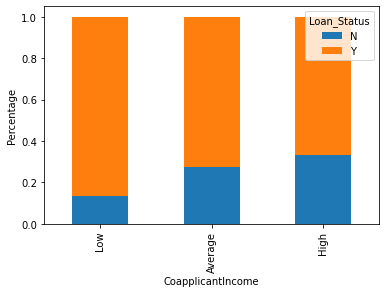

In [32]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [33]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

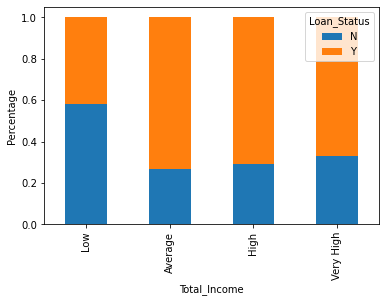

In [34]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [35]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

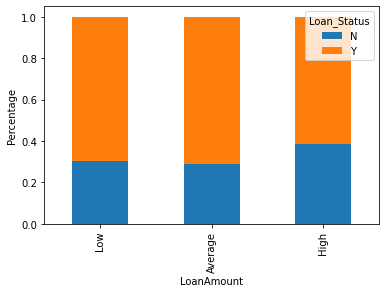

In [36]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [37]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis=1)

In [38]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

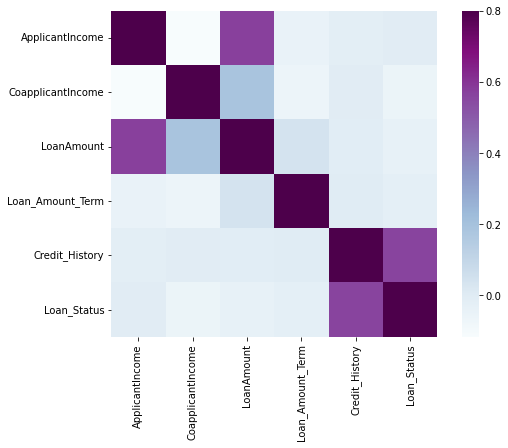

In [39]:
matrix = train.corr() 
f, ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [40]:
#Missing Value Imputation

In [41]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [43]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [44]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [45]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [46]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

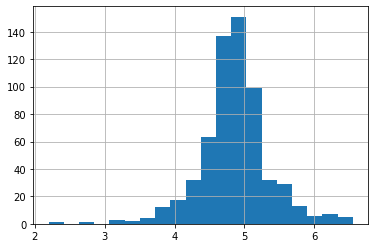

In [48]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [49]:
#Model Building Logistic Regression

In [50]:
train=train.drop('Loan_ID', axis=1)

In [51]:
test=test.drop('Loan_ID', axis=1)

In [52]:
y=train.Loan_Status
x=train.drop('Loan_Status',1)

In [53]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size=0.3)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [57]:
pred_cv = model.predict(x_cv)

In [58]:
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [59]:
pred_test = model.predict(test)

In [60]:
submission=pd.read_csv("D:\PROJECT\Loan Prediction\sample_submission_49d68Cx.csv")

In [61]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [62]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [63]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [64]:
from sklearn.model_selection import StratifiedKFold

In [65]:
i=1 
kf= StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{}of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1of kfold 5
accuracy_score 0.8048780487804879

2of kfold 5
accuracy_score 0.8373983739837398

3of kfold 5
accuracy_score 0.7804878048780488

4of kfold 5
accuracy_score 0.7886178861788617

5of kfold 5
accuracy_score 0.7950819672131147


In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(x, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.iloc[train_index], x.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score:', score)
    
    i += 1
    
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]



1 of kfold 5
accuracy_score: 0.8048780487804879

2 of kfold 5
accuracy_score: 0.8373983739837398

3 of kfold 5
accuracy_score: 0.7804878048780488

4 of kfold 5
accuracy_score: 0.7886178861788617

5 of kfold 5
accuracy_score: 0.7950819672131147


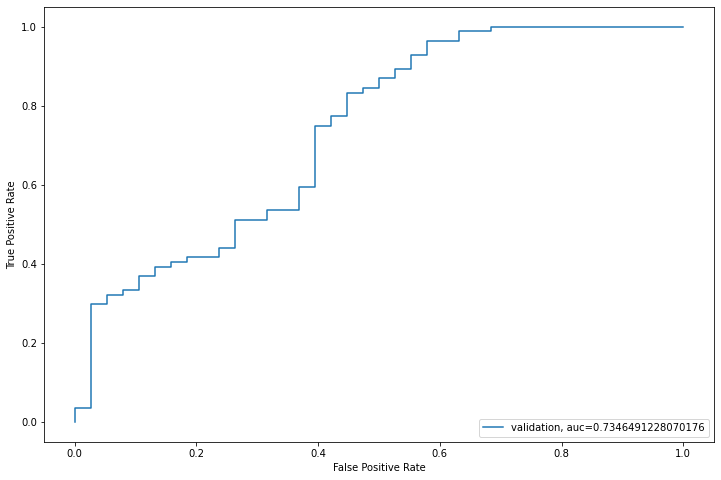

In [67]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [68]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [69]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [70]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [71]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

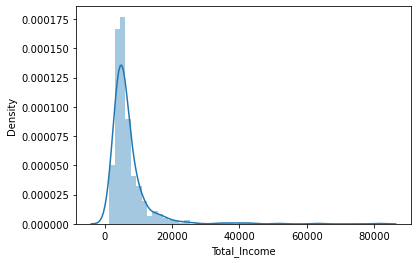

In [72]:
sns.distplot(train['Total_Income'])

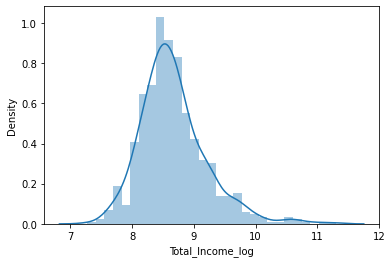

In [73]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']=np.log(test['Total_Income'])

In [74]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

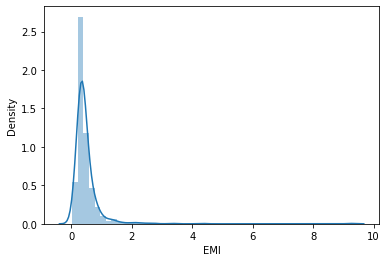

In [75]:
sns.distplot(train['EMI'])

In [76]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

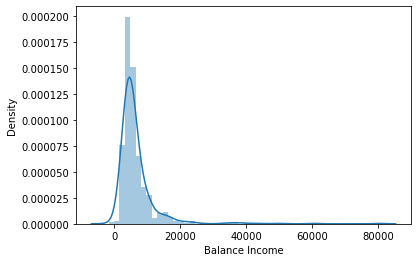

In [77]:
sns.distplot(train['Balance Income'])

In [78]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

In [79]:
y=train.Loan_Status
x=train.drop('Loan_Status',1)

In [80]:
#Logistic Regression

In [81]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [82]:
submission['Loan_status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [83]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [84]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('log2.csv')

In [85]:
#Decision Tree

In [86]:
from sklearn import tree

In [87]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [88]:
submission['Loan_status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [89]:
#Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size=0.3, random_state=1)

In [96]:
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False), fit_params=None, iid=True, n_jobs=1, param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19], 'n_estimators': [1,21,41,61,81,101,121,141,161,181]}, pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'fit_params'

<AxesSubplot:>

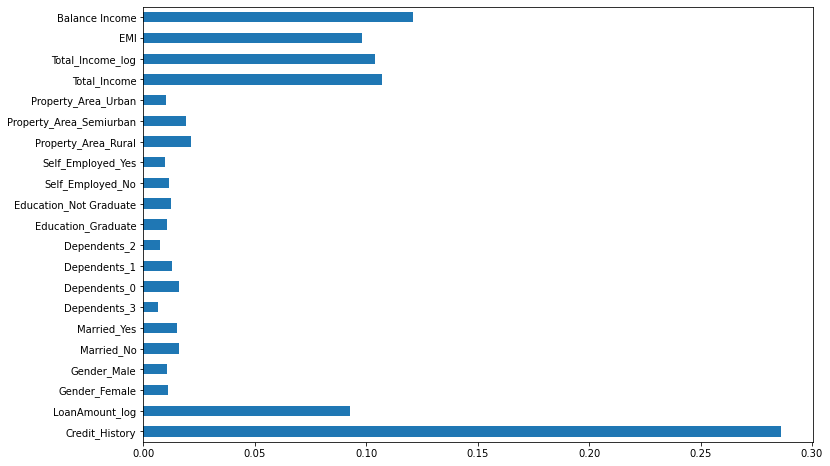

In [97]:
importances=pd.Series(model.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

In [98]:
#XGBOOST

In [99]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [100]:
from xgboost import XGBClassifier

In [101]:
i=1 
kf= StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{}of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1of kfold 5
accuracy_score 0.7804878048780488

2of kfold 5
accuracy_score 0.7886178861788617

3of kfold 5
accuracy_score 0.7642276422764228

4of kfold 5
accuracy_score 0.7804878048780488

5of kfold 5
accuracy_score 0.7622950819672131


In [102]:
submission['Loan_status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

In [1]:
#Check validation Score & mean score. Compare which one is more accurate

In [ ]:
#As we can see that Logistic regression gives 80% accuracy, @nd decision Tree with 76% accuracy